## Chapter 28: Data Analysis

This chapter covers the introduction to some data analysis.  We will load data from existing datasets (that are from a package), do some plotting and some analysis of the dataset. 

Let's load the following packages.

In [1]:
using RDatasets, StatsBase, Statistics, DataFrames

The RDatasets package is a bunch of datasets that are built-in to the R language, a statistics language that is quite popular.  The following shows all of the data packages:

In [2]:
RDatasets.packages()

Row,Package,Title
,String15,String
1,COUNT,"Functions, data and code for count data."
2,Ecdat,Data sets for econometrics
3,HSAUR,A Handbook of Statistical Analyses Using R (1st Edition)
4,HistData,Data sets from the history of statistics and data visualization
5,ISLR,Data for An Introduction to Statistical Learning with Applications in R
6,KMsurv,"Data sets from Klein and Moeschberger (1997), Survival Analysis"
7,MASS,Support Functions and Datasets for Venables and Ripley's MASS
8,SASmixed,"Data sets from ""SAS System for Mixed Models"""
9,Zelig,Everyone's Statistical Software


Each package as a set of datasets within it.  Here's the datasets in the `datasets` package. 

In [3]:
RDatasets.datasets("datasets")

Row,Package,Dataset,Title,Rows,Columns
,String15,String31,String,Int64,Int64
1,datasets,BOD,Biochemical Oxygen Demand,6,2
2,datasets,CO2,Carbon Dioxide Uptake in Grass Plants,84,5
3,datasets,Formaldehyde,Determination of Formaldehyde,6,2
4,datasets,HairEyeColor,Hair and Eye Color of Statistics Students,32,4
5,datasets,InsectSprays,Effectiveness of Insect Sprays,72,2
6,datasets,LifeCycleSavings,Intercountry Life-Cycle Savings Data,50,6
7,datasets,Loblolly,Growth of Loblolly pine trees,84,4
8,datasets,OrchardSprays,Potency of Orchard Sprays,64,4
9,datasets,PlantGrowth,Results from an Experiment on Plant Growth,30,2


This loads the `iris` dataset from the `datasets` package.  The result is a `DataFrame` and we will see details about this later.  Each column in a `DataFrame` has a particular type, but this is better for general datasets than an array.  The column headers give the name of the column as well as the datatype of the column: 

In [4]:
iris = RDatasets.dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


#### 28.2: Accessing the DataFrame

We can get a column by using brackets and the name of the column (preceded with a colon).  The result is a 1-D array of the type give by the column type. 

In [5]:
iris[!,:SepalWidth]

150-element Vector{Float64}:
 3.5
 3.0
 3.2
 3.1
 3.6
 3.9
 3.4
 3.4
 2.9
 3.1
 ⋮
 3.1
 2.7
 3.2
 3.3
 3.0
 2.5
 3.0
 3.4
 3.0

We can also select the column by number.

In [6]:
iris[!,2]

150-element Vector{Float64}:
 3.5
 3.0
 3.2
 3.1
 3.6
 3.9
 3.4
 3.4
 2.9
 3.1
 ⋮
 3.1
 2.7
 3.2
 3.3
 3.0
 2.5
 3.0
 3.4
 3.0

We can also access a column with the dataset.column notation

In [7]:
iris.SepalWidth

150-element Vector{Float64}:
 3.5
 3.0
 3.2
 3.1
 3.6
 3.9
 3.4
 3.4
 2.9
 3.1
 ⋮
 3.1
 2.7
 3.2
 3.3
 3.0
 2.5
 3.0
 3.4
 3.0

If you only want part of a column, we can use a range to access the desired rows.

In [8]:
iris[11:20,:SepalWidth]

10-element Vector{Float64}:
 3.7
 3.4
 3.0
 3.0
 4.0
 4.4
 3.9
 3.5
 3.8
 3.8

In [31]:
iris.SepalWidth[11:20]

10-element Vector{Float64}:
 3.7
 3.4
 3.0
 3.0
 4.0
 4.4
 3.9
 3.5
 3.8
 3.8

And other subsettings like as arrays work as well:

In [9]:
iris.PetalWidth[1:2:end]

75-element Vector{Float64}:
 0.2
 0.2
 0.2
 0.3
 0.2
 0.2
 0.1
 0.2
 0.4
 0.3
 ⋮
 2.2
 1.4
 2.4
 1.8
 2.4
 1.9
 2.5
 1.9
 2.3

#### Common functions of DataFrames

This is the size of the DataFrame.  this is similar to the `size` function for an array.  This shows that there are 150 rows and 5 columns. 

In [10]:
size(iris)

(150, 5)

Here are the column names:

In [11]:
names(iris)

5-element Vector{String}:
 "SepalLength"
 "SepalWidth"
 "PetalLength"
 "PetalWidth"
 "Species"

Here are the column types.  Note that the last one is a Categorical Value (since there are only 3 different values).  This runs the built-in function `eltype` over each of the columns.  The `.` is broadcasting over the columns.

In [12]:
eltype.(eachcol(iris))

5-element Vector{DataType}:
 Float64
 Float64
 Float64
 Float64
 CategoricalArrays.CategoricalValue{String, UInt8}

The first few rows of a DataFrame

In [15]:
first(iris,5)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


And the last 5 rows:

In [16]:
last(iris,5)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,6.7,3.0,5.2,2.3,virginica
2,6.3,2.5,5.0,1.9,virginica
3,6.5,3.0,5.2,2.0,virginica
4,6.2,3.4,5.4,2.3,virginica
5,5.9,3.0,5.1,1.8,virginica


### Basic Statistics

The `describe` function gives basic information about numerical variables with include mean, min, median, max and the number of missing values as well as the type.  Note: we will see missing values later in the chapter.

In [13]:
describe(iris)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String, UInt8}"


In [14]:
mean(iris.SepalWidth), std(iris.SepalWidth)

(3.0573333333333332, 0.4358662849366982)

#### 28.3: Creating a Dataframe

Although typically data (as a `DataFrame`) is loaded from a file or from the `RDatasets` package, we can make a data frame in the following way. 

Note: that the data is in columns and each is a vector or converted to a vector.

In [15]:
data = DataFrame(A = 1:2:13, B = ["M", "F", "F", "M","X","F","M"], C=[3.0,2.5,pi,-2.3,1/3,56,100],D=[(-1)^n//n for n=1:7])

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,1,M,3.0,-1//1
2,3,F,2.5,1//2
3,5,F,3.14159,-1//3
4,7,M,-2.3,1//4
5,9,X,0.333333,-1//5
6,11,F,56.0,1//6
7,13,M,100.0,-1//7


In [16]:
size(data)

(7, 4)

In [17]:
names(data)

4-element Vector{String}:
 "A"
 "B"
 "C"
 "D"

In [18]:
describe(data)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,A,7.0,1,7.0,13,0,Int64
2,B,,F,,X,0,String
3,C,23.2393,-2.3,3.0,100.0,0,Float64
4,D,-319//2940,-1//1,-0.142857,1//2,0,Rational{Int64}


#### 28.4: Plotting data in a DataFrame

We can plot the data in a DataFrame using `Makie` like:

In [19]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

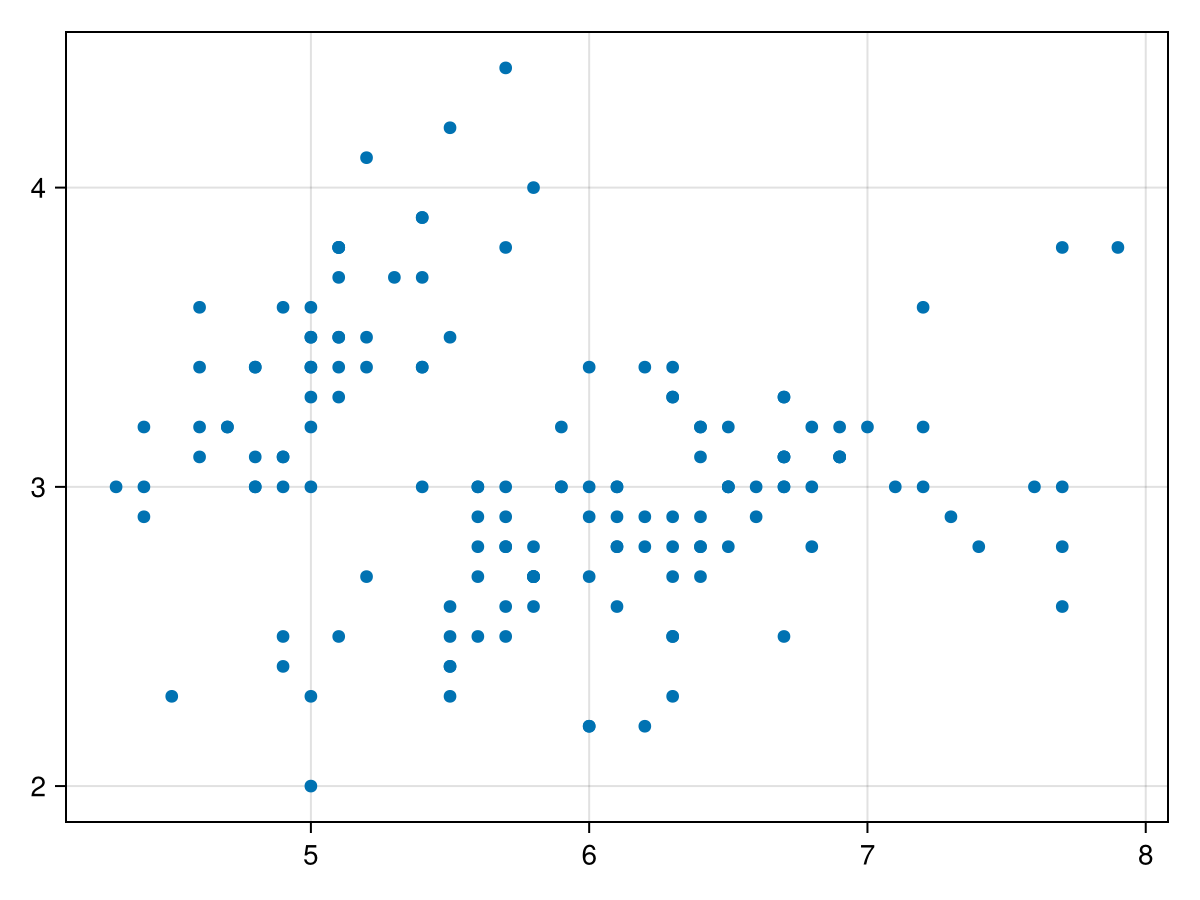

In [21]:
scatter(iris.SepalLength, iris.SepalWidth)

Here's a nice plot by coloring depending on Species, the categorical variable.

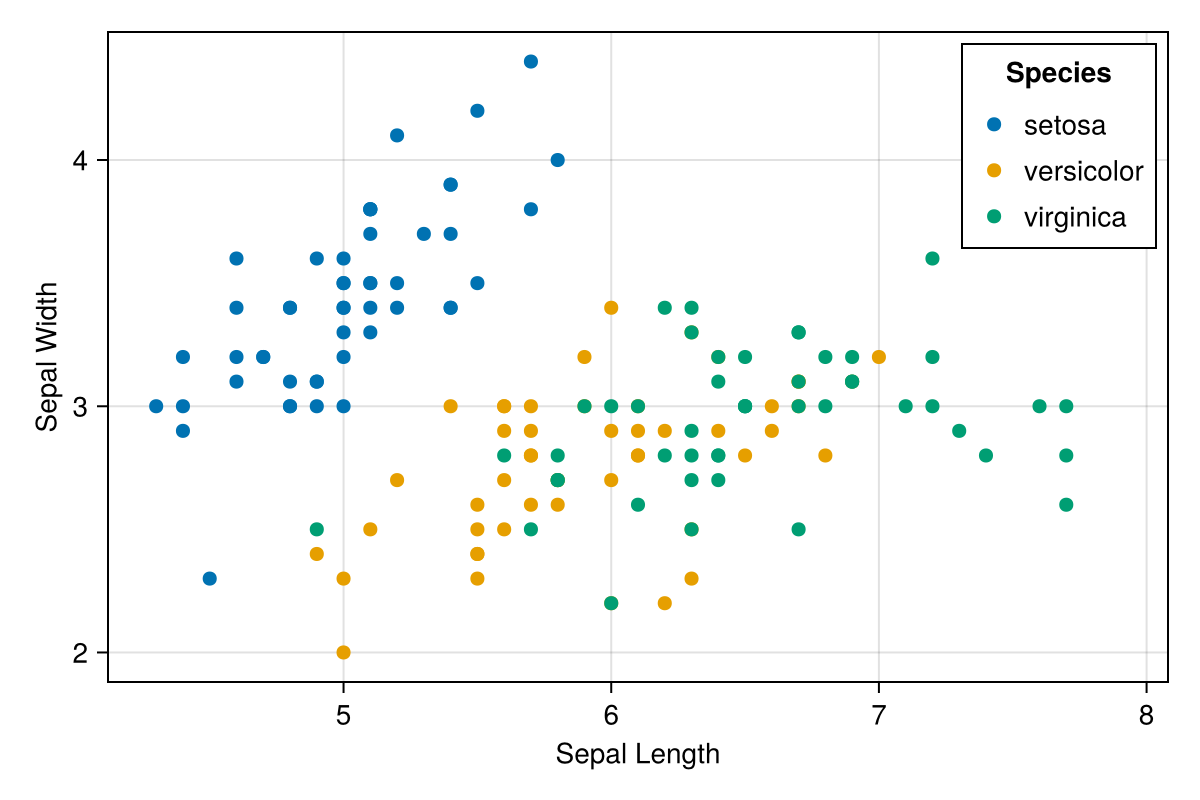

In [23]:
species = iris.Species
categ = unique(species)
colors = Makie.wong_colors()

fig = Figure(size=(600, 400))
ax = Axis(fig[1, 1]; xlabel="Sepal Length", ylabel="Sepal Width")

for (idx, c) in enumerate(categ)
    indices = findall(x -> x == c, species)
    scatter!(iris.SepalLength[indices], iris.SepalWidth[indices],
        color = colors[idx],
        markersize=10, label="$(c)")
end
axislegend("Species")
fig

## 28.5: The Pipe function

Consider the following crazy, made up nested function evaluation
$$ \ln(\sqrt{e^{\sin(\tan^{-1}(0.25)}})$$
In julia we can evaluate this with

In [40]:
log(sqrt(exp(sin(atan(0.25)))))

0.1212678125181664

And if you are not careful, the parentheses can be difficult to balance right. However, another way to think of this is to start with the number 0.25, apply the arctangent, apply the sine, apply the exponent, apply the square root, then apply the log. This can be done without parenetheses in the following way:

In [25]:
0.25 |> atan |> sin |> exp |> sqrt |> log

0.1212678125181664

resulting in the same value.  The `|>` is the pipe command which takes the value on the left and "sends" it to the function on the right. We can successively send (or pipe) to multiple functions as above and this is how it is powerful.

This works however only for functions of a single variable that has a name, but we can adapt this to other functions with an anonymous function.  Consider calculating $\sin(1+ e^{0.25})$ using pipes. We do this with

In [26]:
0.25 |> x-> 1+ exp(x) |> sin

0.7562530960821656

#### Another example

Let's look at an example with an array.  Calculate  ` deleteat!([1,2,3,4,5],3)` using pipes

In [43]:
1:5 |> collect |> arr -> deleteat!(arr,3)

4-element Vector{Int64}:
 1
 2
 4
 5

If you find this kinda overkill, you're right with these examples. We will do this with dataframes below, which is where it can get quite nice.

We will use the `Chain` package to help as well.  add this to the package manager and then

In [2]:
using Chain

The chain package has a macro called `@chain` which will make the steps even clearer.  The above steps can be written as

In [28]:
@chain 1:5 begin
  collect
  deleteat!(3)
end

4-element Vector{Int64}:
 1
 2
 4
 5

Between the `@chain` and the `begin` is what we are starting with.  In this case, the range `1:5`. Then each line inside the `@chain` does a separate step.  
1. call `collect`, that is make the vector.
2. delete the 3rd element. 

The way this works, is that `@chain` inserts the line above in the first argument of each line.  That is the first line is really `collect(1:5)` and then the second line is `deleteat!(collect(1:5),3)`.

Hopefully you can see that with 3 or more steps, this can simplify things. 

Here's another example. 
1. Start with the vector [1,2,3,4,5,6,7,8,9,10],
2. square each element 
3. keep all even numbers 
4. find the mean.

We will do this starting with `1:10` and then making a single function call on each line of the `@chain`.

In [35]:
@chain 1:10 begin
  collect
  _.^2
  filter(iseven,_)
  mean
end

44.0

Notice that on the 3rd and 4th lines that there is an underscore `_`. This tells `@chain` where to put the argument from the above line.

#### Exercise

We are going to find the standard deviation of the numbers $\pi/3, 4\pi/3, 7\pi,3, 10\pi/3, \ldots, 100\pi/3$ by the following.
1. start with the range from 1 to 100.
2. make a vector.
3. filter only values that only appear in 1,4,7,10, ...
4. multiply by $\pi/3$ 
5. find the standard deviation

In [6]:
@chain 1:100 begin
    collect
    filter(x -> x % 3 == 1, _)
    _ *pi/3
    std
end

31.28475299206779

### 28.6: Missing Data

Often in a DataFrame, data is missing and julia has a data type called `Missing` that has only one value, `missing`.  Before we examine missing and DataFrames, here's some examples with just the missing value:

In [7]:
typeof(missing)

Missing

In [8]:
missing+6

missing

In [9]:
mean([1,2,3,missing,5])

missing

In many ways, any operation of `missing` results in `missing` and in many ways, this is a way to signal that data is missing.

#### missing values in a DataFrame

Recall that the `simpsons` dataset above had missing data:

In [10]:
simpsons = DataFrame(
    id=[5,3,13,1,7,9,11],
    name=["Homer","Marge","Lisa","Bart","Maggie","Apu","Moe"],
    age =[45,42,8,10,1,38,59],
    salary = [50000,25000,10000,missing,missing,45000,3000],
    favorite_food = ["pork chops","casserole","salad","hamburger",missing,"saag paneer","peanuts"]
  )

Row,id,name,age,salary,favorite_food
,Int64,String,Int64,Int64?,String?
1,5,Homer,45,50000,pork chops
2,3,Marge,42,25000,casserole
3,13,Lisa,8,10000,salad
4,1,Bart,10,missing,hamburger
5,7,Maggie,1,missing,missing
6,9,Apu,38,45000,saag paneer
7,11,Moe,59,3000,peanuts


First, note that the datatypes on the salary and favorite_food columns have a ?.  Actually the data type of these is: 

In [11]:
eltype.(eachcol(simpsons))

5-element Vector{Type}:
 Int64
 String
 Int64
 Union{Missing, Int64}
 Union{Missing, String}

And you can see that the last two element types are `Union{Missing,Int64}` and `Union{Missing,String}`.  The Union datatype is a way to handle more than Type.  This means that the elements of salary can be either `String` or `Missing`.  

We can find the maximum age with:

In [12]:
maximum(simpsons.age)

59

But if we do the same with the salary column:

In [13]:
maximum(simpsons.salary)

missing

There is a nice function called `skipmissing` which is a bit strange in that:

In [14]:
skipmissing(simpsons.salary)

skipmissing(Union{Missing, Int64}[50000, 25000, 10000, missing, missing, 45000, 3000])

And doesn't see to do anything except wrap the array in a `skipmissing` function, but if we now look for the maximum with:

In [15]:
maximum(skipmissing(simpsons.salary))

50000

An alternative way to do this using `@chain` is as follows:

In [19]:
@chain simpsons begin
  _.salary
  skipmissing
  maximum
end

50000

which just finds the mean of the 3 non-missing values.

#### A better way of handling missing values in a dataframe

A better way to do this is with a `dropmissing` function in `DataFrames`.  This creates a new dataframe that filters out any row that has a missing value. For example

In [20]:
dropmissing(simpsons)

Row,id,name,age,salary,favorite_food
,Int64,String,Int64,Int64,String
1,5,Homer,45,50000,pork chops
2,3,Marge,42,25000,casserole
3,13,Lisa,8,10000,salad
4,9,Apu,38,45000,saag paneer
5,11,Moe,59,3000,peanuts


Also, if you want to just filter rows with missing value in a particular column(s), you can do the following:

In [21]:
dropmissing(simpsons, :favorite_food)

Row,id,name,age,salary,favorite_food
,Int64,String,Int64,Int64?,String
1,5,Homer,45,50000,pork chops
2,3,Marge,42,25000,casserole
3,13,Lisa,8,10000,salad
4,1,Bart,10,missing,hamburger
5,9,Apu,38,45000,saag paneer
6,11,Moe,59,3000,peanuts


And using this we can repeat the steps above with the `@chain` syntax:

In [24]:
@chain simpsons begin
    dropmissing(:salary)
    combine(:salary => maximum, :salary => mean)
end

Row,salary_maximum,salary_mean
,Int64,Float64
1,50000,26600.0


### 28.9 Loading data from a file

Most of the time, data is in a file.  One common format is a comma separated value (CSV) file.  

In [25]:
using CSV

In [26]:
simple = CSV.read("simple.csv", DataFrame)

Row,Name,Age,Sex,Shoe Size,Pay Rate
,String15,Int64,String1,Float64,Float64
1,Alice,18,F,6.5,15.5
2,Barry,24,M,12.0,18.25
3,Charlize,45,X,8.0,22.5
4,Doreen,72,F,7.5,24.5
5,Edgar,64,M,10.0,33.0
6,Francine,16,F,9.0,18.75


This is nice, however, if we want to access the last two columns, we may need to surround with double quotes like:

In [27]:
simple."Shoe Size"

6-element Vector{Float64}:
  6.5
 12.0
  8.0
  7.5
 10.0
  9.0

or

In [28]:
simple[!,:"Shoe Size"]

6-element Vector{Float64}:
  6.5
 12.0
  8.0
  7.5
 10.0
  9.0

However, the `CSV.read` method has an option to replace spaces with `_` using `normalizenames`

In [33]:
simple = CSV.read("simple.csv", DataFrame, normalizenames = true)

Row,Name,Age,Sex,Shoe_Size,Pay_Rate
,String15,Int64,String1,Float64,Float64
1,Alice,18,F,6.5,15.5
2,Barry,24,M,12.0,18.25
3,Charlize,45,X,8.0,22.5
4,Doreen,72,F,7.5,24.5
5,Edgar,64,M,10.0,33.0
6,Francine,16,F,9.0,18.75


In [34]:
simple.Shoe_Size

6-element Vector{Float64}:
  6.5
 12.0
  8.0
  7.5
 10.0
  9.0

Another ubiquitous data format is an Excel file (uggh).  However Julia can load it with the `XLSX` package

In [37]:
using XLSX

And then use the `readxlsx` method.  Note: since this is not exported by the `XSLX` package, you need to give the full name to the method:

In [41]:
xf = XLSX.readxlsx("simple.xlsx")

XLSXFile("simple.xlsx") containing 1 Worksheet
            sheetname size          range        
-------------------------------------------------
               Sheet1 7x5           A1:E7        


The result is an `XSLXFile` object saying all of the sheets and the range of the data inside each sheet. We can access the sheet in the following way:

In [42]:
xf["Sheet1"]

7×5 XLSX.Worksheet: ["Sheet1"](A1:E7) 

But more helpful is the `readtable` method.  And then wrap a `DataFrame` around this:

In [43]:
df = DataFrame(XLSX.readtable("simple.xlsx", "Sheet1"))

Row,Name,Age,Sex,Shoe Size,Pay Rate
,Any,Any,Any,Any,Any
1,Alice,18,F,6.5,15.5
2,Barry,24,M,12,18.25
3,Charlize,45,X,8,22.5
4,Doreen,72,F,7.5,24.5
5,Edgar,64,M,10,33
6,Francine,16,F,9,18.75


Note that this has the same issue that the column names have spaces.  We can fix this with the `rename!` command:

In [44]:
rename!(df, :"Shoe Size" => :Shoe_Size, :"Pay Rate" => :Pay_Rate)

Row,Name,Age,Sex,Shoe_Size,Pay_Rate
,Any,Any,Any,Any,Any
1,Alice,18,F,6.5,15.5
2,Barry,24,M,12,18.25
3,Charlize,45,X,8,22.5
4,Doreen,72,F,7.5,24.5
5,Edgar,64,M,10,33
6,Francine,16,F,9,18.75


However, the column types are not correct.  This isn't a big deal for a small dataframe, but if it was larger, this could result in things being slow.  We can fix this with the `infer_types` option:

In [45]:
df = DataFrame(XLSX.readtable("simple.xlsx", "Sheet1", infer_eltypes=true))

Row,Name,Age,Sex,Shoe Size,Pay Rate
,String,Int64,String,Float64,Float64
1,Alice,18,F,6.5,15.5
2,Barry,24,M,12.0,18.25
3,Charlize,45,X,8.0,22.5
4,Doreen,72,F,7.5,24.5
5,Edgar,64,M,10.0,33.0
6,Francine,16,F,9.0,18.75


In [85]:
rename!(df, :"Shoe Size" => :Shoe_Size, :"Pay Rate" => :Pay_Rate)

Row,Name,Age,Sex,Shoe_Size,Pay_Rate
,String,Int64,String,Float64,Float64
1,Alice,18,F,6.5,15.5
2,Barry,24,M,12.0,18.25
3,Charlize,45,X,8.0,22.5
4,Doreen,72,F,7.5,24.5
5,Edgar,64,M,10.0,33.0
6,Francine,16,F,9.0,18.75


In [47]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Name,,Alice,,Francine,0,String
2,Age,39.8333,16,34.5,72,0,Int64
3,Sex,,F,,X,0,String
4,Shoe Size,8.83333,6.5,8.5,12.0,0,Float64
5,Pay Rate,22.0833,15.5,20.625,33.0,0,Float64
